In [1]:
import pandas as pd
import numpy as np

In [2]:
# the goal is to predict the house price by using Linear Regression

In [3]:
data = pd.read_csv('House_Price.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      919 non-null    float64
 1   Market_dist    919 non-null    float64
 2   Hospital_dist  931 non-null    float64
 3   Carpet_area    924 non-null    float64
 4   Builtup_area   917 non-null    float64
 5   Parking_type   932 non-null    object 
 6   City_type      932 non-null    object 
 7   Rainfall       932 non-null    int64  
 8   Price_house    932 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB


In [4]:
# check for outliers
data['Price_house'].quantile([0, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1]) # different quantiles

0.000        30000.0
0.010      2177480.0
0.100      3742300.0
0.300      4921300.0
0.500      5866000.0
0.700      6913000.0
0.900      8201100.0
0.950      8790800.0
0.990      9954210.0
0.995     10198905.0
1.000    150000000.0
Name: Price_house, dtype: float64

In [5]:
def remove_outliers(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    data = data.loc[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR)))]
    return data

In [6]:
test = data.copy()
test.boxplot(column = ['Price_house'])

<AxesSubplot:>

<AxesSubplot:>

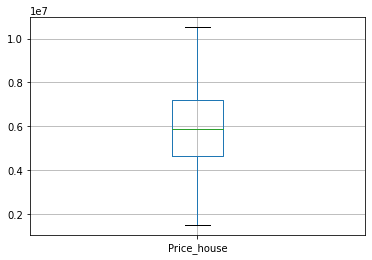

In [7]:
test = remove_outliers(test, 'Price_house')
test.boxplot(column = ['Price_house'])

In [8]:
my_remaining_columns = data.columns.to_list()
my_remaining_columns

['Taxi_dist',
 'Market_dist',
 'Hospital_dist',
 'Carpet_area',
 'Builtup_area',
 'Parking_type',
 'City_type',
 'Rainfall',
 'Price_house']

In [9]:
my_remaining_columns.pop(-1) # remove the column name we already modified ---- Price_house
my_remaining_columns.remove('Parking_type')
my_remaining_columns.remove('City_type')
my_remaining_columns

['Taxi_dist',
 'Market_dist',
 'Hospital_dist',
 'Carpet_area',
 'Builtup_area',
 'Rainfall']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      919 non-null    float64
 1   Market_dist    919 non-null    float64
 2   Hospital_dist  931 non-null    float64
 3   Carpet_area    924 non-null    float64
 4   Builtup_area   917 non-null    float64
 5   Parking_type   932 non-null    object 
 6   City_type      932 non-null    object 
 7   Rainfall       932 non-null    int64  
 8   Price_house    932 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB


In [11]:
for val in my_remaining_columns:
    data = remove_outliers(data, val)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      893 non-null    float64
 1   Market_dist    893 non-null    float64
 2   Hospital_dist  905 non-null    float64
 3   Carpet_area    898 non-null    float64
 4   Builtup_area   892 non-null    float64
 5   Parking_type   906 non-null    object 
 6   City_type      906 non-null    object 
 7   Rainfall       906 non-null    int64  
 8   Price_house    906 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 70.8+ KB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

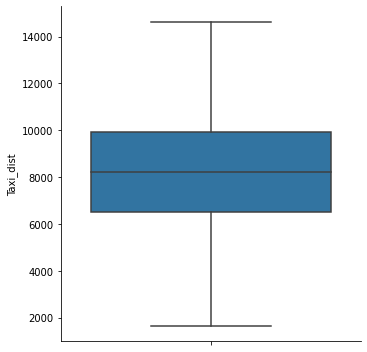

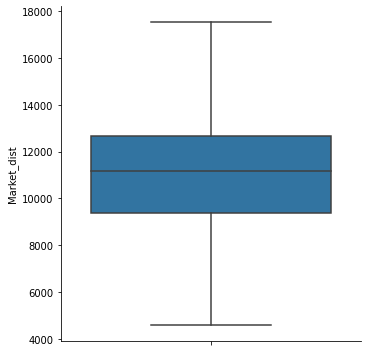

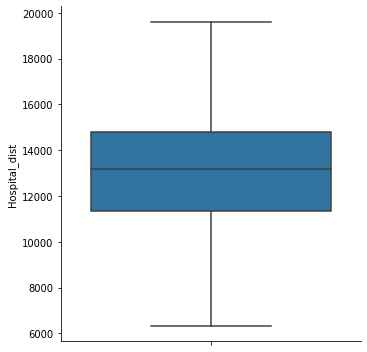

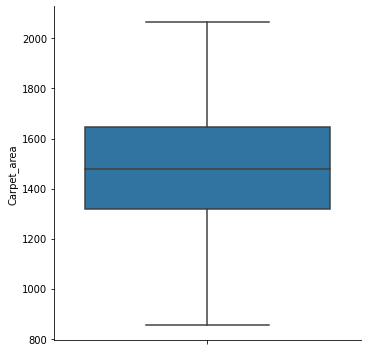

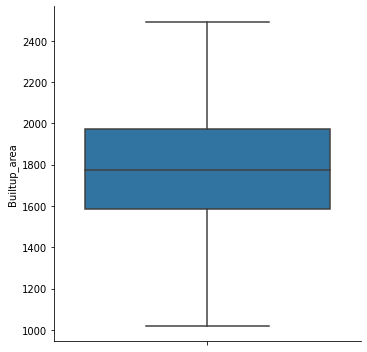

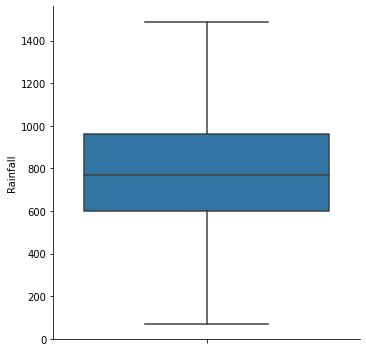

In [13]:
# check for outliers by using boxplots
for val in my_remaining_columns:
    sns.catplot(y = val, data = data, kind = 'box', sym = '')
    plt.show()

In [14]:
# drop missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      893 non-null    float64
 1   Market_dist    893 non-null    float64
 2   Hospital_dist  905 non-null    float64
 3   Carpet_area    898 non-null    float64
 4   Builtup_area   892 non-null    float64
 5   Parking_type   906 non-null    object 
 6   City_type      906 non-null    object 
 7   Rainfall       906 non-null    int64  
 8   Price_house    906 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 70.8+ KB


In [15]:
data.isnull().sum() # since only contain small amount of missing values, we can simply drop them

Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area     14
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

In [16]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      873 non-null    float64
 1   Market_dist    873 non-null    float64
 2   Hospital_dist  873 non-null    float64
 3   Carpet_area    873 non-null    float64
 4   Builtup_area   873 non-null    float64
 5   Parking_type   873 non-null    object 
 6   City_type      873 non-null    object 
 7   Rainfall       873 non-null    int64  
 8   Price_house    873 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 68.2+ KB


In [17]:
# Now we need to use dummies_variable to deal with categorical features.
data.Parking_type.value_counts()

Open            342
Not Provided    220
Covered         176
No Parking      135
Name: Parking_type, dtype: int64

In [18]:
data.City_type.value_counts()

CAT B    341
CAT A    307
CAT C    225
Name: City_type, dtype: int64

### drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables. Otherwise VIF part will results inf!!!!

In [19]:
# creating dummy variables
cat = data.loc[:, ['City_type', 'Parking_type']]
print(cat.head())
dum = pd.get_dummies(cat.astype(str), drop_first = True) # why drop_first?
dum.head()

  City_type  Parking_type
0     CAT B          Open
1     CAT B  Not Provided
2     CAT A  Not Provided
3     CAT B       Covered
4     CAT B  Not Provided


,City_type_CAT B,City_type_CAT C,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open
0,1,0,0,0,1
1,1,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,1,0


In [20]:
newdata = pd.concat([data, dum], axis = 1) 
newdata = newdata.drop(columns = ['Parking_type', 'City_type'])
newdata

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house,City_type_CAT B,City_type_CAT C,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,1,0,0,0,1
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,1,0,0,1,0
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,0,1,0
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,0
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,1080,6639000,0,1,0,0,0
928,7214.0,8717.0,10553.0,1387.0,1663.0,850,8208000,0,0,0,0,1
929,7423.0,11708.0,13220.0,1200.0,1436.0,1060,7644000,0,0,0,0,1
930,15082.0,14700.0,19617.0,1299.0,1560.0,770,9661000,1,0,0,0,1


In [21]:
# start linear regression modeling
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

X = newdata.loc[:, newdata.columns != 'Price_house']
y = newdata['Price_house']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)
print('X_train shape {}'.format(X_train.shape))
print('y_train shape {}'.format(y_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('y_test shape {}'.format(y_test.shape))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


X_train shape (698, 11)
y_train shape (698,)
X_test shape (175, 11)
y_test shape (175,)


### Developing Model

In [25]:
X_train_new = sm.add_constant(X_train)
LR = sm.OLS(y_train, X_train_new).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     64.15
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.03e-97
Time:                        21:24:48   Log-Likelihood:                -10758.
No. Observations:                 698   AIC:                         2.154e+04
Df Residuals:                     686   BIC:                         2.159e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.987e+06   4.28e+05     11.641      0.000    4.15e+06    5.83e+06
Taxi_dist                    32.3918     30.640      1.057      0.291     -27.767      92.551
Market_dist                   7.2575     23.293      0.312      0.755     -38.476      52.991
Hospital_dist                72.7405     33.888      2.146      0.032       6.203     139.278
Carpet_area                1540.9179   3883.473      0.397      0.692   -6084.003    9165.838
Builtup_area               -560.6743   3242.816     -0.173      0.863   -6927.710    5806.361
Rainfall                     81.6049    177.741      0.459      0.646    -267.376     430.586
City_type_CAT B           -1.806e+06   1.07e+05    -16.837      0.000   -2.02e+06    -1.6e+06
City_type_CAT C           -2.872e+06   1.19e+05    -24.137      0.000   -3.11e+06   -2.64e+06
Parking_type_No Parking   -6.104e+05   1.52e+05     -4.011      0.000   -9.09e+05   -3.12e+05
Parking_type_Not Provided -3.523e+05   1.37e+05     -2.572      0.010   -6.21e+05   -8.34e+04
Parking_type_Open         -3.643e+05   1.26e+05     -2.891      0.004   -6.12e+05   -1.17e+05
==============================================================================
Omnibus:                        3.269   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                3.103
Skew:                           0.135   Prob(JB):                        0.212
Kurtosis:                       3.185   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# check ANOVA (Prob F-statistic < 0.05)
print('since Prob F-statistic is equal to 1.03e-97, it is less than 0.05')

since Prob F-statistic is equal to 1.03e-97, it is less than 0.05


In [27]:
# check independent p-value (P>|t|) (p < 0.05):

# depend on the t value, we delete the feature with lowest |t| values

# here is the Builtup_area |-0.173| = 0.173

X_train_new = X_train_new.drop(columns = 'Builtup_area')
LR = sm.OLS(y_train, X_train_new).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     70.66
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.21e-98
Time:                        21:24:52   Log-Likelihood:                -10758.
No. Observations:                 698   AIC:                         2.154e+04
Df Residuals:                     687   BIC:                         2.159e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.985e+06   4.28e+05     11.649      0.000    4.14e+06    5.82e+06
Taxi_dist                    32.5740     30.600      1.065      0.287     -27.507      92.655
Market_dist                   7.1972     23.274      0.309      0.757     -38.499      52.893
Hospital_dist                72.6197     33.857      2.145      0.032       6.144     139.096
Carpet_area                 870.2788    189.762      4.586      0.000     497.697    1242.861
Rainfall                     81.2114    177.600      0.457      0.648    -267.494     429.916
City_type_CAT B           -1.806e+06   1.07e+05    -16.853      0.000   -2.02e+06    -1.6e+06
City_type_CAT C           -2.872e+06   1.19e+05    -24.159      0.000   -3.11e+06   -2.64e+06
Parking_type_No Parking     -6.1e+05   1.52e+05     -4.012      0.000   -9.09e+05   -3.12e+05
Parking_type_Not Provided -3.514e+05   1.37e+05     -2.569      0.010    -6.2e+05   -8.28e+04
Parking_type_Open         -3.644e+05   1.26e+05     -2.894      0.004   -6.12e+05   -1.17e+05
==============================================================================
Omnibus:                        3.228   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.058
Skew:                           0.135   Prob(JB):                        0.217
Kurtosis:                       3.181   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# check independent p-value (P>|t|) (p < 0.05):


# depend on the t value, we delete the feature with lowest |t| values

# here is the Market_dist with |t| = 0.309

X_train_new = X_train_new.drop(columns = 'Market_dist')
LR = sm.OLS(y_train, X_train_new).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     78.61
Date:                Mon, 25 Oct 2021   Prob (F-statistic):           1.39e-99
Time:                        21:25:01   Log-Likelihood:                -10758.
No. Observations:                 698   AIC:                         2.154e+04
Df Residuals:                     688   BIC:                         2.158e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       5.01e+06   4.19e+05     11.945      0.000    4.19e+06    5.83e+06
Taxi_dist                    32.0701     30.536      1.050      0.294     -27.886      92.026
Hospital_dist                77.2569     30.335      2.547      0.011      17.696     136.818
Carpet_area                 868.4773    189.547      4.582      0.000     496.317    1240.638
Rainfall                     83.3749    177.346      0.470      0.638    -264.829     431.579
City_type_CAT B            -1.81e+06   1.07e+05    -16.973      0.000   -2.02e+06    -1.6e+06
City_type_CAT C           -2.873e+06   1.19e+05    -24.187      0.000   -3.11e+06   -2.64e+06
Parking_type_No Parking   -6.116e+05   1.52e+05     -4.028      0.000    -9.1e+05   -3.13e+05
Parking_type_Not Provided -3.517e+05   1.37e+05     -2.573      0.010    -6.2e+05   -8.33e+04
Parking_type_Open         -3.651e+05   1.26e+05     -2.901      0.004   -6.12e+05   -1.18e+05
==============================================================================
Omnibus:                        3.226   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                3.056
Skew:                           0.135   Prob(JB):                        0.217
Kurtosis:                       3.180   Cond. No.                     1.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# check independent p-value (P>|t|) (p < 0.05):

# depend on the t value, we delete the feature with lowest |t| values

# here is the Rainfall with |t| = 0.470

X_train_new = X_train_new.drop(columns = 'Rainfall')
LR = sm.OLS(y_train, X_train_new).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     88.50
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          1.59e-100
Time:                        21:25:09   Log-Likelihood:                -10758.
No. Observations:                 698   AIC:                         2.153e+04
Df Residuals:                     689   BIC:                         2.157e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       5.07e+06      4e+05     12.685      0.000    4.28e+06    5.85e+06
Taxi_dist                    31.0706     30.445      1.021      0.308     -28.706      90.847
Hospital_dist                78.8326     30.133      2.616      0.009      19.670     137.995
Carpet_area                 864.5981    189.261      4.568      0.000     493.001    1236.195
City_type_CAT B            -1.81e+06   1.07e+05    -16.986      0.000   -2.02e+06    -1.6e+06
City_type_CAT C           -2.874e+06   1.19e+05    -24.213      0.000   -3.11e+06   -2.64e+06
Parking_type_No Parking   -6.158e+05   1.52e+05     -4.064      0.000   -9.13e+05   -3.18e+05
Parking_type_Not Provided -3.535e+05   1.37e+05     -2.589      0.010   -6.22e+05   -8.54e+04
Parking_type_Open         -3.638e+05   1.26e+05     -2.894      0.004   -6.11e+05   -1.17e+05
==============================================================================
Omnibus:                        3.284   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.117
Skew:                           0.136   Prob(JB):                        0.211
Kurtosis:                       3.183   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# check independent p-value (P>|t|) (p < 0.05):

# depend on the t value, we delete the feature with lowest |t| values

# here is the Taxi_dist = 1.021

X_train_new = X_train_new.drop(columns = 'Taxi_dist')
LR = sm.OLS(y_train, X_train_new).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 25 Oct 2021   Prob (F-statistic):          2.55e-101
Time:                        21:25:20   Log-Likelihood:                -10758.
No. Observations:                 698   AIC:                         2.153e+04
Df Residuals:                     690   BIC:                         2.157e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      5.013e+06   3.96e+05     12.665      0.000    4.24e+06    5.79e+06
Hospital_dist               102.6491     19.063      5.385      0.000      65.222     140.077
Carpet_area                 859.7992    189.208      4.544      0.000     488.307    1231.291
City_type_CAT B           -1.804e+06   1.06e+05    -16.955      0.000   -2.01e+06    -1.6e+06
City_type_CAT C           -2.868e+06   1.19e+05    -24.191      0.000    -3.1e+06   -2.64e+06
Parking_type_No Parking    -6.13e+05   1.51e+05     -4.046      0.000    -9.1e+05   -3.16e+05
Parking_type_Not Provided -3.463e+05   1.36e+05     -2.539      0.011   -6.14e+05   -7.85e+04
Parking_type_Open         -3.599e+05   1.26e+05     -2.864      0.004   -6.07e+05   -1.13e+05
==============================================================================
Omnibus:                        3.794   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                3.625
Skew:                           0.151   Prob(JB):                        0.163
Kurtosis:                       3.183   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# next step is to check the R square and Adj R square, (0-1, closer to 1 better the model)
# R-squared:	0.506 (satisfied)
# Adj R-squared: 0.501 (satisfied)

In [32]:
# Next, we need to make sure all the VIF factor are less than 2

In [33]:
# Method 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X_train_new)

var = pd.DataFrame(round(LR.pvalues, 3))
# print(var)
# LR.rsquared
var['coeff'] = LR.params

var["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
print(var)

                               0         coeff  VIF Factor
const                      0.000  5.013342e+06   75.636009
Hospital_dist              0.000  1.026491e+02    1.013496
Carpet_area                0.000  8.597992e+02    1.010883
City_type_CAT B            0.000 -1.803956e+06    1.304644
City_type_CAT C            0.000 -2.868171e+06    1.289054
Parking_type_No Parking    0.000 -6.129763e+05    1.524345
Parking_type_Not Provided  0.011 -3.462960e+05    1.699268
Parking_type_Open          0.004 -3.599218e+05    1.792842


In [34]:
# Method 2
var = pd.DataFrame(round(LR.pvalues, 3))
# print(var)
# LR.rsquared
var['coeff'] = LR.params

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = LR.model.exog

vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
var['vif'] = vif
print(var)

                               0         coeff        vif
const                      0.000  5.013342e+06  75.636009
Hospital_dist              0.000  1.026491e+02   1.013496
Carpet_area                0.000  8.597992e+02   1.010883
City_type_CAT B            0.000 -1.803956e+06   1.304644
City_type_CAT C            0.000 -2.868171e+06   1.289054
Parking_type_No Parking    0.000 -6.129763e+05   1.524345
Parking_type_Not Provided  0.011 -3.462960e+05   1.699268
Parking_type_Open          0.004 -3.599218e+05   1.792842


In [35]:
X_test.columns

Index(['Taxi_dist', 'Market_dist', 'Hospital_dist', 'Carpet_area',
       'Builtup_area', 'Rainfall', 'City_type_CAT B', 'City_type_CAT C',
       'Parking_type_No Parking', 'Parking_type_Not Provided',
       'Parking_type_Open'],
      dtype='object')

In [36]:
X_train_new.columns

Index(['const', 'Hospital_dist', 'Carpet_area', 'City_type_CAT B',
       'City_type_CAT C', 'Parking_type_No Parking',
       'Parking_type_Not Provided', 'Parking_type_Open'],
      dtype='object')

In [37]:
X_test = X_test.drop(['Carpet_area', 'Market_dist', 'Taxi_dist', 'Rainfall'], axis = 1)

In [38]:
# get the predicted value
X_test_new = sm.add_constant(X_test)
pred = LR.predict(X_test_new)
pred

727    5.781289e+06
318    7.519610e+06
525    7.344890e+06
233    4.882923e+06
242    5.314347e+06
           ...     
172    5.933297e+06
1      5.672486e+06
453    7.573006e+06
239    7.304424e+06
590    5.699497e+06
Length: 175, dtype: float64

In [41]:
result = pd.DataFrame(y_test)
result

,Price_house
727,5384000
318,7653000
525,8372000
233,6383000
242,4916000
...,...
172,8034000
1,3982000
453,10292000
239,7386000


In [42]:
# MAPE should be 0 - 1, closer to 0 better the model
result['pred'] = pred
result['MAPE'] = abs((result['Price_house'] - result['pred'])/result['Price_house'])
result.MAPE.mean() * 100

18.841743860539946

In [43]:
result

,Price_house,pred,MAPE
727,5384000,5.781289e+06,0.073791
318,7653000,7.519610e+06,0.017430
525,8372000,7.344890e+06,0.122684
233,6383000,4.882923e+06,0.235011
242,4916000,5.314347e+06,0.081031
...,...,...,...
172,8034000,5.933297e+06,0.261477
1,3982000,5.672486e+06,0.424532
453,10292000,7.573006e+06,0.264185
239,7386000,7.304424e+06,0.011045


In [44]:
# check for assumption normality
# assumption normality test
# use Skapiro Wilk test
# Null: The residuals are normally distributed
# Alter: The residuals are not normally distributed

# LR.resid = the error, the residual

from scipy import stats
stats.shapiro(LR.resid) # the 2nd value is p-value

ShapiroResult(statistic=0.9973776340484619, pvalue=0.3336174786090851)

In [49]:
from scipy.stats import normaltest
normaltest(LR.resid) 

NormaltestResult(statistic=3.793816006487786, pvalue=0.15003180061675267)

In [50]:
# since the p-value is greater than 0.05, so we are good to go

In [47]:
#Checking for autocorrelation
#Null Hypothesis: Autocorrelation is absent.
#Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(LR.resid , lags = 1)#2nd value is p value; 

(array([1.73176463]), array([0.18818569]))

In [51]:
# Since the p-value is greater than 0.05, so we are good

In [52]:
#Checking heteroscedasticity
#Null Hypothesis: Error terms are homoscedastic
#Alternative Hypothesis: Error terms are heteroscedastic.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(LR.resid, LR.model.exog)
lzip(name, test)#2nd value is p value;  here the p-value should be greater than 0.05

[('F statistic', 0.9865718483807978), ('p-value', 0.5496318915889135)]

In [53]:
#Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(LR.resid, LR.model.exog)
lzip(name, test) # here the p-value should be greater than 0.05

[('Lagrange multiplier statistic', 6.02355385382145),
 ('p-value', 0.5370017945456265),
 ('f-value', 0.8580498827017632),
 ('f p-value', 0.5395174091796311)]

In [54]:
# print the result vs the predicted result + MAPE 
print(result)

     Price_house          pred      MAPE
727      5384000  5.781289e+06  0.073791
318      7653000  7.519610e+06  0.017430
525      8372000  7.344890e+06  0.122684
233      6383000  4.882923e+06  0.235011
242      4916000  5.314347e+06  0.081031
..           ...           ...       ...
172      8034000  5.933297e+06  0.261477
1        3982000  5.672486e+06  0.424532
453     10292000  7.573006e+06  0.264185
239      7386000  7.304424e+06  0.011045
590      4917000  5.699497e+06  0.159141

[175 rows x 3 columns]
